In [107]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [108]:
ada = yf.download('ADA-USD', period='10y', auto_adjust=True)['Close']
btc = yf.download('BTC-USD', period='10y', auto_adjust=True)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Histograma BTC e ADA

C:\Users\mateu\AppData\Local\Temp\ipykernel_5744\428671361.py:4: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



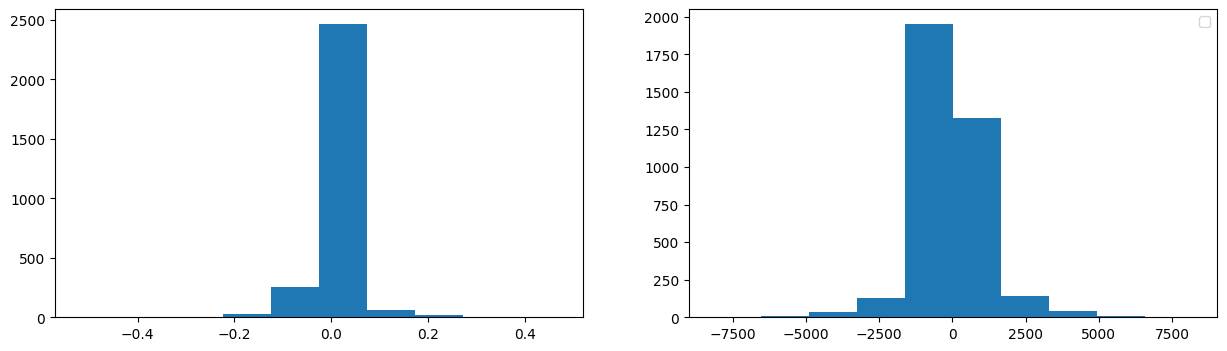

In [109]:
fig, ax = plt.subplots(figsize=(15, 4), ncols=2, nrows=1)
ax[0].hist(ada.diff())
ax[1].hist(btc.diff())
plt.legend()
plt.show()

In [110]:
btc = pd.DataFrame(
    btc.values, index=btc.index.values, columns=['BTC-USD']
)
btc.reset_index(inplace=True)

In [111]:
btc['mes'] = pd.to_datetime(btc['index']).dt.month_name('pt')
btc.head()

,index,BTC-USD,mes
0,2015-08-16,258.506989,Agosto
1,2015-08-17,257.976013,Agosto
2,2015-08-18,211.078995,Agosto
3,2015-08-19,226.684006,Agosto
4,2015-08-20,235.350006,Agosto


In [112]:
btc['ano'] = pd.to_datetime(btc['index']).dt.year

In [113]:
data = btc.groupby(['mes','ano'])['index'].max()
data = data.reset_index()

In [114]:
data = pd.merge(btc, data, how='inner', on=['mes', 'ano', 'index'])

In [115]:
btc = data

In [123]:
fig = go.Figure()
for ano in btc['ano'].unique():
    subset = btc[btc['ano'] == ano]
    subset['mes'] = pd.Categorical(subset['mes'], categories=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
    subset.sort_values('mes', inplace=True)
    subset['ordem'] = range(len(subset))
    fig.add_trace(go.Scatter(x=subset['ordem'], y=subset['BTC-USD'], name=str(ano), mode='lines'))
    fig.update_layout(
        xaxis = dict(
            ticktext=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
            tickvals=list(range(12))
        )
    )

C:\Users\mateu\AppData\Local\Temp\ipykernel_5744\1347904486.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mateu\AppData\Local\Temp\ipykernel_5744\1347904486.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mateu\AppData\Local\Temp\ipykernel_5744\1347904486.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [124]:
fig.show()

In [134]:
import plotly.express as px

fig = px.line(data, x='ano', y='BTC-USD', color='mes')
fig.update_layout(
    hovermode='x unified',
    height=800,
)